#A classification model which predict the sentiment of feedback

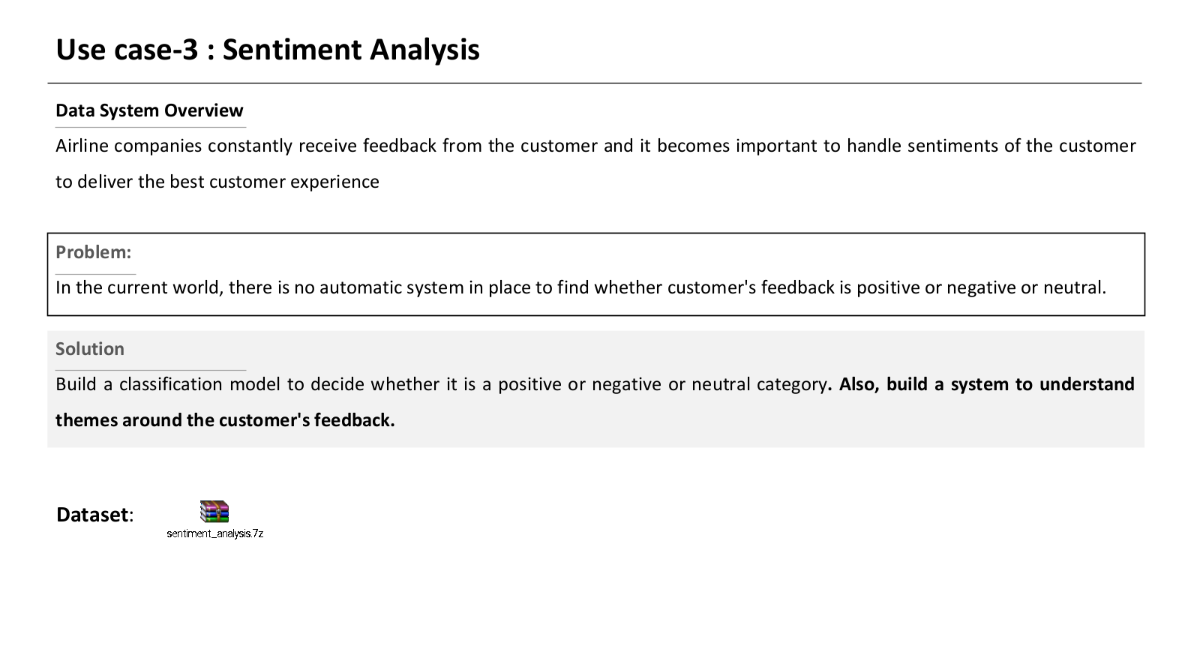

 ## implications for business.

1. Customer Satisfaction Improvement:

The model can classify feedback as positive, negative, or neutral, helping airlines understand the overall sentiment of their customers.
By identifying common negative sentiments, airlines can address specific issues that impact customer satisfaction.
2. Operational Enhancements:

Analysis of feedback can reveal patterns related to specific aspects of airline services, such as flight delays, in-flight services, or baggage handling.
Airlines can use this information to make targeted improvements in their operations, leading to better overall customer experiences.
3. Brand Reputation Management:

Identifying and addressing negative sentiments promptly can prevent potential damage to the airline's reputation.
Positive sentiment analysis can highlight areas where the airline is excelling, allowing them to leverage these strengths in marketing and branding efforts.
4. Competitive Advantage:

Understanding customer sentiments gives airlines a competitive edge by allowing them to differentiate their services based on customer feedback.
Continuous improvement based on feedback can contribute to long-term customer loyalty and positive word-of-mouth.
5. Targeted Marketing Campaigns:

By categorizing sentiments, airlines can tailor marketing campaigns to address specific concerns or highlight areas where they excel.
This targeted approach can resonate better with customers and attract new business.

##Importing the necessary Library

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

Count Vectorizer is a popular technique in natural language processing (NLP) and machine learning for converting a collection of text documents to a matrix of token counts. In simpler terms, it helps in representing text data numerically.

Here's how it works: It first tokenizes the text into individual words and then counts the frequency of each word in each document. The result is a matrix where each row corresponds to a document, and each column corresponds to a unique word in the entire set of documents. The values in the matrix represent the count of each word in the respective documents.
Example:
1. ["I", "love", "programming"]
2. ["Programming", "is", "fun"]
3. ["Machine", "learning", "is", "fascinating"]

| Document         | I | love | programming | is | fun | Machine | learning | fascinating |
|------------------|---|------|--------------|----|-----|---------|----------|-------------|
| "I love..."      | 1 | 1    | 1            | 0  | 0   | 0       | 0        | 0           |
| "Programming..." | 0 | 0    | 1            | 1  | 1   | 0       | 0        | 0           |
| "Machine..."     | 0 | 0    | 0            | 1  | 0   | 1       | 1        | 1           |


##Read the dataset

In [49]:
df=pd.read_csv('sentiment_analysis.csv')

In [50]:
df

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


##Checking for null value

In [51]:
df.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

##Data preprocessing

In [52]:
df.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


In [53]:
#remove all the @ symbol, url, number and special character
df['text'] = df['text'].str.replace('@\S+|http\S+|[^A-Za-z0-9]+', ' ')


# Convert text to lowercase
df['text'] = df['text'].str.lower()

##Split of dataset into train and test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)


###View of data in train and test


In [55]:
X_train

750      @united you are offering us 8 rooms for 32 peo...
6875     @jetblue jfk nyc staff is amazing. the #lax je...
7598     @jetblue well, the last update was in the righ...
14124    @americanair flight 3056 still sitting at dfw ...
6187     @southwestair is your companion pass broken to...
                               ...                        
5191     @southwestair replacing @vitaminwater with bee...
13418    @americanair at lax and your service reps just...
5390     @southwestair been on hold for over an hour - ...
860      @united we would...how do i contact you to dis...
7270     @jetblue that's ok! it just sure seemed like i...
Name: text, Length: 11712, dtype: object

In [56]:
y_train

750      negative
6875     negative
7598     positive
14124    negative
6187      neutral
           ...   
5191     positive
13418    negative
5390     negative
860      negative
7270      neutral
Name: airline_sentiment, Length: 11712, dtype: object

In [57]:
X_test

4794     @southwestair you're my early frontrunner for ...
10480    @usairways how is it that my flt to ewr was ca...
8067     @jetblue what is going on with your bdl to dca...
8880     @jetblue do they have to depart from washingto...
8292     @jetblue i can probably find some of them. are...
                               ...                        
11765    @usairways on hold for 2 hours. you know what ...
14156    @americanair how hard is it to have catering r...
10963    @usairways @americanair i'm in the #finalstret...
4877     .@southwestair well, we all need something to ...
5206     @southwestair please please please answer the ...
Name: text, Length: 2928, dtype: object

In [58]:
y_test

4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
11765    negative
14156    negative
10963     neutral
4877      neutral
5206     negative
Name: airline_sentiment, Length: 2928, dtype: object

##Text preprocessing and vectorization using CountVectorizer

In [59]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

The code performs text preprocessing and vectorization using CountVectorizer from scikit-learn to create feature matrices for training and testing data, by removing stop words and creating sparse matrices of token counts.

In [60]:
X_train_vect

<11712x12987 sparse matrix of type '<class 'numpy.int64'>'
	with 106745 stored elements in Compressed Sparse Row format>

##Model building using Naive bayes

In [61]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

MultinomialNB()

##Print Accuracy_Report and Confusion Matrix

In [62]:
y_pred = nb_model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7766393442622951
Confusion Matrix:
[[1820   47   22]
 [ 346  202   32]
 [ 174   33  252]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1889
     neutral       0.72      0.35      0.47       580
    positive       0.82      0.55      0.66       459

    accuracy                           0.78      2928
   macro avg       0.77      0.62      0.66      2928
weighted avg       0.77      0.78      0.75      2928



support refers to the number of samples in the test set that belong to a particular class. precission mean True positive/Predicted Positive. Recall meansTrue positive/Actual positive. F1 score= (2*precision.recall)/(precision+recall)
Macro average (macro avg) computes the average performance across all classes by simply taking the arithmetic mean of the metric for each class. Each class is weighted equally in this approach, regardless of the number of samples in each class.

Weighted average (weighted avg) computes the average performance across all classes by weighting each class based on its relative size in the test set. This approach takes into account the imbalance in the number of samples in each class, and gives more weight to classes with more samples.

Neutral class:

Precision = 211 / (48 + 211 + 26) = 0.7345 Recall = 211 / (336 + 211 + 33) = 0.3555 F1-score = 2 * 0.7345 * 0.3555 / (0.7345 + 0.3555) = 0.4790

Macro-averaged precision = (Precision for negative class + Precision for neutral class + Precision for positive class) / 3

Weighted-averaged precision = (Precision for negative class * Support for negative class + Precision for neutral class * Support for neutral class + Precision for positive class * Support for positive class) / Total support

##Demo Prediction using Naive Bayes Model

In [63]:
# Example new data
new_data = ['I had a great experience flying with Virgin America!',
            'My flight with Delta was terrible. I will never fly with them again.']

# Preprocess new data
new_data = [text.lower().replace('@\S+|http\S+|[^A-Za-z0-9]+', ' ') for text in new_data]

# Convert new data to numerical features
new_data_vect = vectorizer.transform(new_data)

# Predict sentiment for new data
new_data_pred = nb_model.predict(new_data_vect)

print(new_data_pred)


['positive' 'negative']
